In [2]:
import os
import time
import uuid
import cv2

In [15]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [16]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [51]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [52]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

In [53]:
images.as_numpy_iterator().next()

b'data/images/f8c7289e-7172-11ed-b710-f434f0e25b32.jpg'

In [54]:
type(images), len(images)

(tensorflow.python.data.ops.dataset_ops.ShuffleDataset, 35)

In [47]:
image_generator = images.batch(5).as_numpy_iterator()

In [48]:
plot_images = image_generator.next()
plot_images

array([b'data/images/f28f70e4-7172-11ed-b710-f434f0e25b32.jpg',
       b'data/images/e6d8cb24-7172-11ed-b710-f434f0e25b32.jpg',
       b'data/images/f91c69d0-7172-11ed-b710-f434f0e25b32.jpg',
       b'data/images/efcee11e-7172-11ed-b710-f434f0e25b32.jpg',
       b'data/images/f6009226-7172-11ed-b710-f434f0e25b32.jpg'],
      dtype=object)

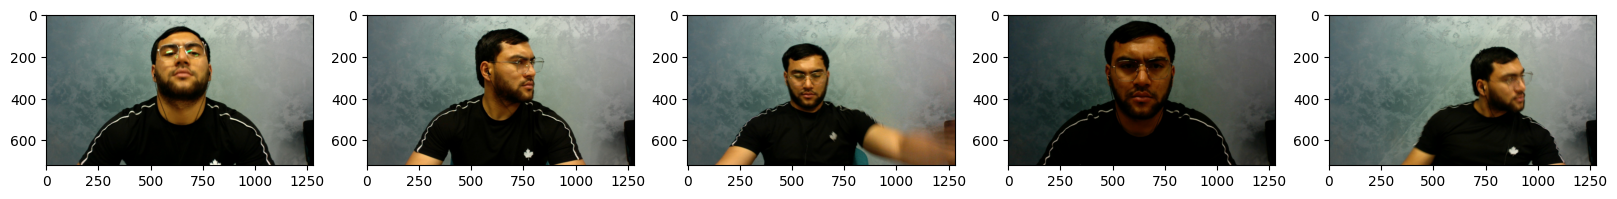

In [49]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, image in enumerate(plot_images):
    im = str(image)[2:-1]
    image = plt.imread(im)
    ax[idx].imshow(image)
plt.show()

In [50]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/images'